In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv('emails.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [85]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [87]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [89]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [91]:
# Preaparing data for training
x = df.drop(['Email No.','Prediction'], axis=1)
y=df['Prediction']

In [95]:
# importing libraries
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [99]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [101]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [107]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train_sc,y_train)

SVC(kernel='linear', random_state=42)

In [109]:
y_pred_knn = knn.predict(x_test_sc)
print("KNN Classifier - Accuracy:", accuracy_score(y_test,y_pred_knn))
print("KNN Classifier - Report:", classification_report(y_test,y_pred_knn, target_names=['Not spam','spam']))

KNN Classifier - Accuracy: 0.8454106280193237
KNN Classifier - Report:               precision    recall  f1-score   support

    Not spam       0.98      0.80      0.88       739
        spam       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035



In [113]:
y_pred_svm = svm.predict(x_test_sc)
print("SVM - Accuracy:", accuracy_score(y_test,y_pred_svm))
print("SVM - Reprot:", classification_report(y_test,y_pred_svm, target_names=['Not spam','spam']))

SVM - Accuracy: 0.9468599033816425
SVM - Reprot:               precision    recall  f1-score   support

    Not spam       0.97      0.96      0.96       739
        spam       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



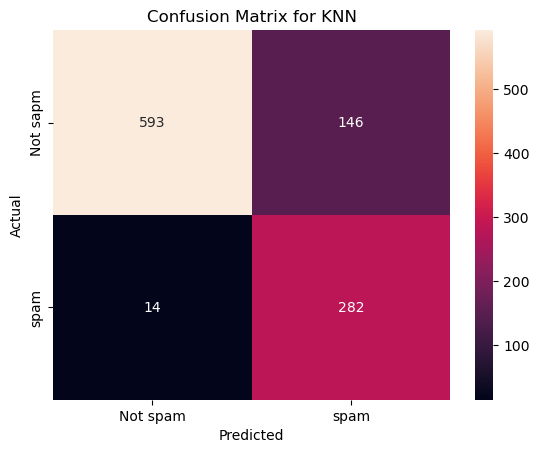

In [117]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True, fmt='g', xticklabels=['Not spam','spam'], yticklabels=['Not sapm','spam'])
plt.title("Confusion Matrix for KNN")


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

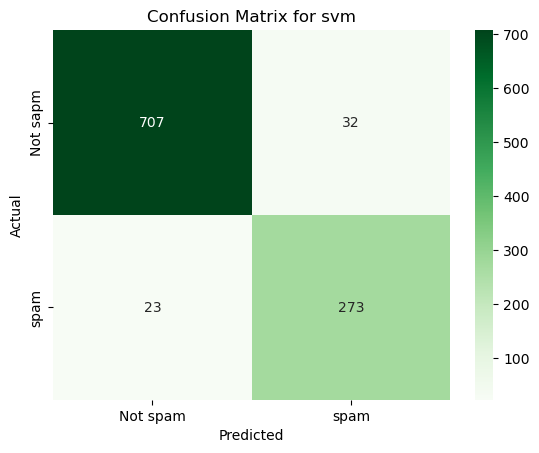

In [119]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True, fmt='g', cmap='Greens', xticklabels=['Not spam','spam'], yticklabels=['Not sapm','spam'])
plt.title("Confusion Matrix for svm")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [121]:
camp = pd.DataFrame({
    'Model' : ['KNN','SVM'],
    'Accuracy' : [accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svm)]
})
print(camp)

  Model  Accuracy
0   KNN  0.845411
1   SVM  0.946860
